In [ ]:
import pandas as pd
import numpy as 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
horse_data = pd.read_csv("horse.csv")

In [ ]:
horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
horse_data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [ ]:
horse_data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
horse_data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


## Looking for columns that don't count for the regression
### Creating copy of data 

In [ ]:
horse_data_copy = horse_data.copy()

In [ ]:
horse_data_copy

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


### Dropping columns that does'nt count for regression

In [ ]:
horse_data_copy.drop(['hospital_number','nasogastric_tube','nasogastric_reflux','nasogastric_reflux_ph','rectal_exam_feces','abdomen','abdomo_appearance','abdomo_protein'],inplace = True,axis = 1)

In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,euthanized,no,3205,0,0,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,euthanized,yes,2208,0,0,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,died,yes,3205,0,0,no
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,lived,yes,2208,0,0,yes


In [ ]:
horse_data_copy.isnull().sum()

surgery                   0
age                       0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          47
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
outcome                   0
surgical_lesion           0
lesion_1                  0
lesion_2                  0
lesion_3                  0
cp_data                   0
dtype: int64

### Converting null values of the columns with suitable arithmetic measure like mean, median and mode or dropping the rows

In [ ]:
horse_data_copy['rectal_temp'].fillna(value = horse_data_copy.rectal_temp.mean(),inplace = True)

In [ ]:
horse_data_copy['pulse'].fillna(value = horse_data_copy.pulse.mean(),inplace = True)

In [ ]:
horse_data_copy['respiratory_rate'].fillna(value = horse_data_copy.respiratory_rate.mean(),inplace = True)

In [ ]:
horse_data_copy['temp_of_extremities'].fillna(value = 'cool',inplace = True)

In [ ]:
horse_data_copy['abdominal_distention'].mode()

0    none
dtype: object

In [ ]:
horse_data_copy['peripheral_pulse'].fillna(value = 'normal',inplace = True)

In [ ]:
horse_data_copy['mucous_membrane'].fillna(value = 'normal_pink',inplace = True)

In [ ]:
horse_data_copy['capillary_refill_time'].fillna(value = 'less_3_sec',inplace = True)

In [ ]:
horse_data_copy['pain'].fillna(value = 'mild_pain',inplace = True)

In [ ]:
horse_data_copy['peristalsis'].fillna(value = 'hypomotile',inplace = True)

In [ ]:
horse_data_copy['total_protein'].fillna(value =(horse_data_copy['total_protein'].mean()) ,inplace = True)

In [ ]:
horse_data_copy['packed_cell_volume'].fillna(value =(horse_data_copy['packed_cell_volume'].mean()) ,inplace = True)

In [ ]:
horse_data_copy['abdominal_distention'].fillna(value = 'none' ,inplace = True)

In [ ]:
horse_data_copy.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.500000,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,45.0,8.400000,died,no,11300,0,0,no
1,yes,adult,39.200000,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.000000,euthanized,no,2208,0,0,no
2,no,adult,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.700000,lived,no,0,0,0,yes
3,yes,young,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.200000,died,yes,2208,0,0,yes
4,no,adult,37.300000,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,74.0,7.400000,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,38.168619,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,55.0,65.000000,euthanized,no,3205,0,0,no
295,no,adult,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,24.274436,euthanized,yes,2208,0,0,yes
296,yes,adult,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.800000,died,yes,3205,0,0,no
297,yes,adult,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.000000,lived,yes,2208,0,0,yes


#### As in the outcome data euthanized means data . Replacing the values of euthanized to dead.

In [ ]:
for i in range(len(horse_data_copy['outcome'])):
    
    if horse_data_copy['outcome'][i] == 'euthanized':
        horse_data_copy['outcome'][i] = 'died'
    else:
        continue

C:\Users\Harry\AppData\Local\Temp/ipykernel_25148/2095685102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horse_data_copy['outcome'][i] = 'died'


In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.500000,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,45.0,8.400000,died,no,11300,0,0,no
1,yes,adult,39.200000,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.000000,died,no,2208,0,0,no
2,no,adult,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.700000,lived,no,0,0,0,yes
3,yes,young,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.200000,died,yes,2208,0,0,yes
4,no,adult,37.300000,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,74.0,7.400000,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,38.168619,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,55.0,65.000000,died,no,3205,0,0,no
295,no,adult,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,24.274436,died,yes,2208,0,0,yes
296,yes,adult,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.800000,died,yes,3205,0,0,no
297,yes,adult,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.000000,lived,yes,2208,0,0,yes


### Comparing different variables by visualizing data 

<AxesSubplot:xlabel='outcome', ylabel='respiratory_rate'>

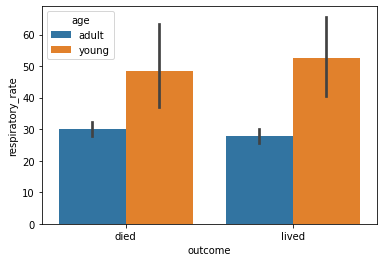

In [ ]:
sns.barplot(data = horse_data_copy,x = horse_data_copy['outcome'],y = horse_data_copy['respiratory_rate'],hue = 'age')

<AxesSubplot:xlabel='outcome', ylabel='pulse'>

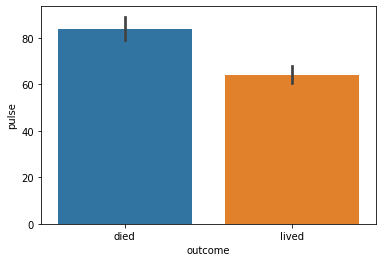

In [ ]:
sns.barplot(data = horse_data_copy,x = horse_data_copy['outcome'],y = horse_data_copy['pulse'])

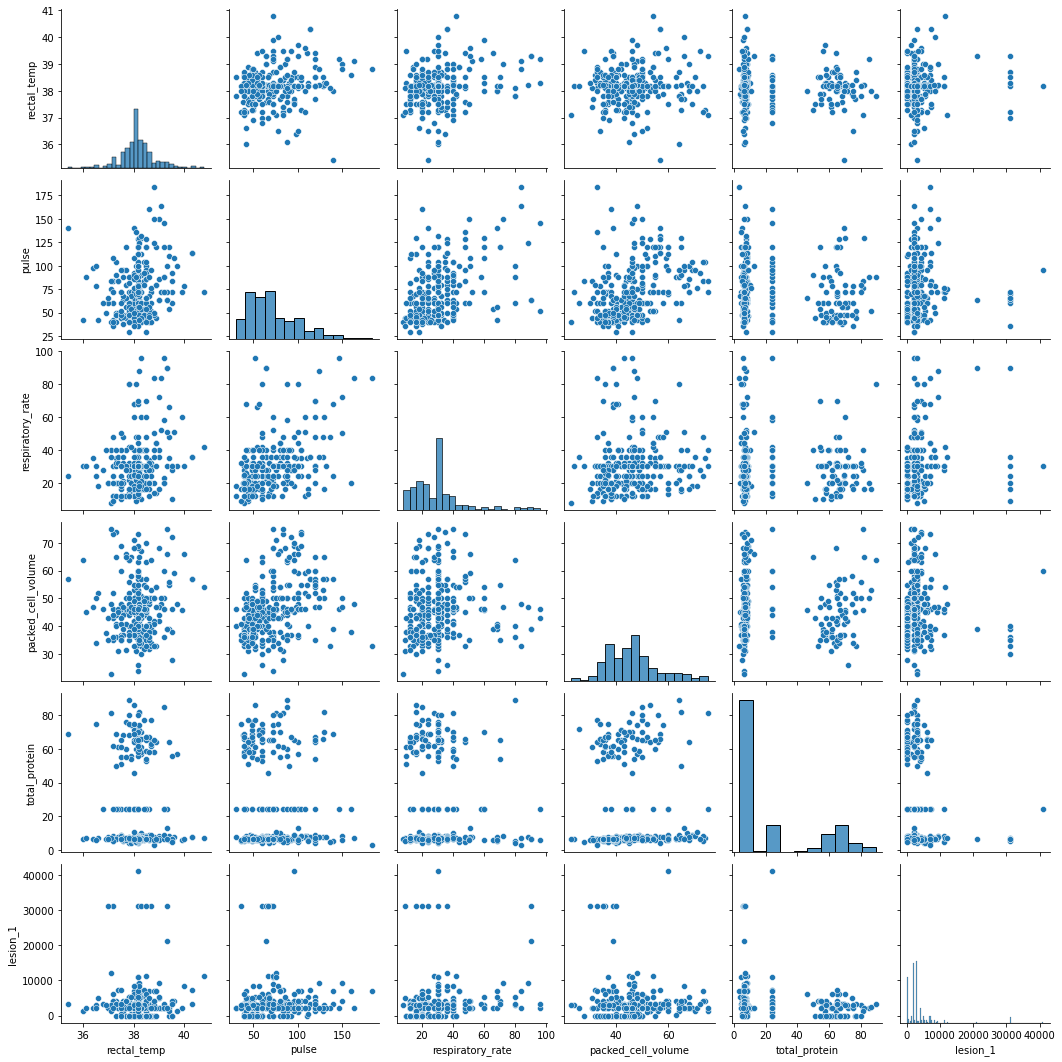

In [ ]:
sns.pairplot(data = horse_data_copy.iloc[:,[2,3,4,12,13,16]])

### From the given visualizations and interpreting it we need to encode our features properly

In [ ]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()

In [ ]:
horse_data_copy['surgical_lesion'] = lm.fit_transform(horse_data_copy['surgical_lesion'])

In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.500000,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,45.0,8.400000,died,0,11300,0,0,no
1,yes,adult,39.200000,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.000000,died,0,2208,0,0,no
2,no,adult,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.700000,lived,0,0,0,0,yes
3,yes,young,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.200000,died,1,2208,0,0,yes
4,no,adult,37.300000,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,74.0,7.400000,died,0,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,38.168619,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,55.0,65.000000,died,0,3205,0,0,no
295,no,adult,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,24.274436,died,1,2208,0,0,yes
296,yes,adult,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.800000,died,1,3205,0,0,no
297,yes,adult,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.000000,lived,1,2208,0,0,yes


In [ ]:
horse_data_copy['age'] = lm.fit_transform(horse_data_copy['age'])

In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,0,38.500000,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,45.0,8.400000,died,0,11300,0,0,no
1,yes,0,39.200000,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.000000,died,0,2208,0,0,no
2,no,0,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.700000,lived,0,0,0,0,yes
3,yes,1,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.200000,died,1,2208,0,0,yes
4,no,0,37.300000,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,74.0,7.400000,died,0,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,0,38.168619,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,55.0,65.000000,died,0,3205,0,0,no
295,no,0,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,24.274436,died,1,2208,0,0,yes
296,yes,0,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.800000,died,1,3205,0,0,no
297,yes,0,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.000000,lived,1,2208,0,0,yes


In [ ]:
horse_data_copy['surgery'] = lm.fit_transform(horse_data_copy['surgery'])

In [ ]:
horse_data_copy.drop(['lesion_2','lesion_3','cp_data'],inplace = True,axis = 1)

In [ ]:
horse_data_copy.iloc[:,5:10] = pd.get_dummies(
    horse_data_copy.iloc[:,5:10])

In [ ]:
horse_data_copy.iloc[:,11] = pd.get_dummies(
    horse_data_copy.iloc[:,11])

In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1
0,no,0,38.500000,66.0,28.0,0,1,0,0,0,0,0,45.0,8.400000,died,0,11300
1,yes,0,39.200000,88.0,20.0,0,1,0,0,0,0,0,50.0,85.000000,died,0,2208
2,no,0,38.300000,40.0,24.0,0,0,1,0,0,2,0,33.0,6.700000,lived,0,0
3,yes,1,39.100000,164.0,84.0,1,0,0,0,0,0,0,48.0,7.200000,died,1,2208
4,no,0,37.300000,104.0,35.0,0,1,0,0,0,2,0,74.0,7.400000,died,0,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,0,38.168619,120.0,70.0,1,0,0,0,0,0,0,55.0,65.000000,died,0,3205
295,no,0,37.200000,72.0,24.0,0,1,0,0,0,2,1,44.0,24.274436,died,1,2208
296,yes,0,37.500000,72.0,30.0,1,0,0,0,0,0,1,60.0,6.800000,died,1,3205
297,yes,0,36.500000,100.0,24.0,0,1,0,0,0,2,1,50.0,6.000000,lived,1,2208


In [ ]:
for i in range(len(horse_data_copy['peristalsis'])):
    
    if horse_data_copy['peristalsis'][i] == 2:
        horse_data_copy['peristalsis'][i] = 1
    else:
        continue

C:\Users\Harry\AppData\Local\Temp/ipykernel_25148/1138325966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horse_data_copy['peristalsis'][i] = 1


In [ ]:
horse_data_copy

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1
0,0,0,0.574074,0.233766,0.227273,0,1,0,0,0,0,0,0.423077,0.059510,0,0,11300
1,1,0,0.703704,0.376623,0.136364,0,1,0,0,0,0,0,0.519231,0.953326,0,0,2208
2,0,0,0.537037,0.064935,0.181818,0,0,1,0,0,1,0,0.192308,0.039673,1,0,0
3,1,1,0.685185,0.870130,0.863636,1,0,0,0,0,0,0,0.480769,0.045508,0,1,2208
4,0,0,0.351852,0.480519,0.306818,0,1,0,0,0,1,0,0.980769,0.047841,0,0,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0.512707,0.584416,0.704545,1,0,0,0,0,0,0,0.615385,0.719953,0,0,3205
295,0,0,0.333333,0.272727,0.181818,0,1,0,0,0,1,1,0.403846,0.244743,0,1,2208
296,1,0,0.388889,0.272727,0.250000,1,0,0,0,0,0,1,0.711538,0.040840,0,1,3205
297,1,0,0.203704,0.454545,0.181818,0,1,0,0,0,1,1,0.519231,0.031505,1,1,2208


In [ ]:
horse_data_copy['outcome'] = lm.fit_transform(horse_data_copy['outcome'])

### Scaling the data according to our need

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
horse_data_copy['pulse'] = scaler.fit_transform(horse_data_copy[['pulse']])

In [ ]:
horse_data_copy['rectal_temp'] = scaler.fit_transform(horse_data_copy[['rectal_temp']])

In [ ]:
horse_data_copy['packed_cell_volume'] = scaler.fit_transform(horse_data_copy[['packed_cell_volume']])

In [ ]:
horse_data_copy['total_protein'] = scaler.fit_transform(horse_data_copy[['total_protein']])

In [ ]:
horse_data_copy['respiratory_rate'] = scaler.fit_transform(horse_data_copy[['respiratory_rate']])

### Doing all the required changes in the datasets and filtering the data we get the below dataset

###### Now trying to predict the label 'lesion_1' by using multivariable linear regression on the dataset

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
x_lr  = horse_data_copy.iloc[:,:16]

In [ ]:
x_lr

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion
0,0,0,0.574074,0.233766,0.227273,0,1,0,0,0,0,0,0.423077,0.059510,0,0
1,1,0,0.703704,0.376623,0.136364,0,1,0,0,0,0,0,0.519231,0.953326,0,0
2,0,0,0.537037,0.064935,0.181818,0,0,1,0,0,1,0,0.192308,0.039673,1,0
3,1,1,0.685185,0.870130,0.863636,1,0,0,0,0,0,0,0.480769,0.045508,0,1
4,0,0,0.351852,0.480519,0.306818,0,1,0,0,0,1,0,0.980769,0.047841,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0.512707,0.584416,0.704545,1,0,0,0,0,0,0,0.615385,0.719953,0,0
295,0,0,0.333333,0.272727,0.181818,0,1,0,0,0,1,1,0.403846,0.244743,0,1
296,1,0,0.388889,0.272727,0.250000,1,0,0,0,0,0,1,0.711538,0.040840,0,1
297,1,0,0.203704,0.454545,0.181818,0,1,0,0,0,1,1,0.519231,0.031505,1,1


In [ ]:
y_lr = horse_data_copy['lesion_1']

In [ ]:
y_lr

0      11300
1       2208
2          0
3       2208
4       4300
       ...  
294     3205
295     2208
296     3205
297     2208
298     6112
Name: lesion_1, Length: 299, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_lr,y_lr,test_size=0.2,random_state=42)

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
y_pred = lr.predict(xtest)

#### Importing R2_score to check the model

In [ ]:
from sklearn.metrics import r2_score

-0.06456872606438324

### checking finite features for prediction

In [ ]:
x_lr1 = horse_data_copy.iloc[:,2:5]

In [ ]:
y_lr1 = horse_data_copy['lesion_1']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_lr1,y_lr1,test_size=0.2,random_state=42)

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
y_pred1 = lr.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred1)


-0.009675303356975196

### Building classification problem

### To build a classification problem we need to have a discrete variable that is 'outcome' in this case

In [ ]:
from sklearn.linear_model import LogisticRegression
lo_re = LogisticRegression()

In [ ]:
x_lg = horse_data_copy.iloc[:,0,1,2,3,4,5,6,7,8,9,10,11,12,13,]

In [ ]:
y_lg = horse_data_copy['outcome']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain_lg,xtest_lg,ytrain_lg,ytest_lg = train_test_split(x_lg,y_lg,test_size=0.2,random_state=42)

In [ ]:
lo_re.fit(xtrain_lg,ytrain_lg)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ypred_lg = lo_re.predict(xtest_lg)

In [ ]:
accuracy_score(ytest_lg,ypred_lg)

0.7